# Try subset of mushroom classification dataset
- Still: overfitting hard to achieve

In [1]:
import os
import sys
import numpy as np
import pandas as pd
#import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
path_root = os.path.dirname(os.getcwd())
path_data = os.path.join(path_root, "data")
filename_data = os.path.join(path_data, "mushrooms_from_kaggle.csv")

In [3]:
data = pd.read_csv(filename_data)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data_1hot = pd.get_dummies(data, drop_first=True)  # this could be pre-done
data_1hot.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
Xall = data_1hot.values[:, 1:]  # data
Yall = data_1hot.values[:, 0] # labels

Xall.shape, Yall.shape

((8124, 95), (8124,))

# Only use subset!

In [11]:
np.random.seed(42)
select_idx = np.random.choice(np.arange(0, Yall.shape[0]), 500)
print(select_idx[:10])

[7270 7603  860 5390 5226 5191 3772 3092 5734 6265]


In [46]:
X = Xall[select_idx,50:70]
Y = Yall[select_idx]
X.shape, Y.shape

((500, 20), (500,))

## Splitting the data into training, validation, and test set

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0) 
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (300), validation (100) and test set (100).


## Build neural network

In [15]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [48]:
n_features = X.shape[1]
n_classes = 1

# Input layer
layers_input = Input(shape=(n_features,), name='input')

# Dense layers
layers_dense = Dense(100, 'relu')(layers_input)
layers_dense = Dense(50, 'relu')(layers_dense)

# Output layer
layers_output = Dense(n_classes, 'sigmoid')(layers_dense)


# Defining the model and compiling it
model = Model(inputs=layers_input, outputs=layers_output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20)]              0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 7,201
Trainable params: 7,201
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_train, Y_train,
                    batch_size = 20,
                    epochs = 10,
                    validation_data=(X_val, Y_val), verbose = 1)

Epoch 1/10
15/15 [==============================] - 1s 14ms/step - loss: 0.6838 - accuracy: 0.5633 - val_loss: 0.6414 - val_accuracy: 0.7400
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.8094 - val_loss: 0.6162 - val_accuracy: 0.7100
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.7088 - val_loss: 0.5982 - val_accuracy: 0.7100
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.7608 - val_loss: 0.5795 - val_accuracy: 0.7200
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.7554 - val_loss: 0.5618 - val_accuracy: 0.7200
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5555 - accuracy: 0.7364 - val_loss: 0.5464 - val_accuracy: 0.7200
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7753 - val_loss: 0.5374 - val_accuracy: 0.7200
Epoch 8/10
15/15 [=

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

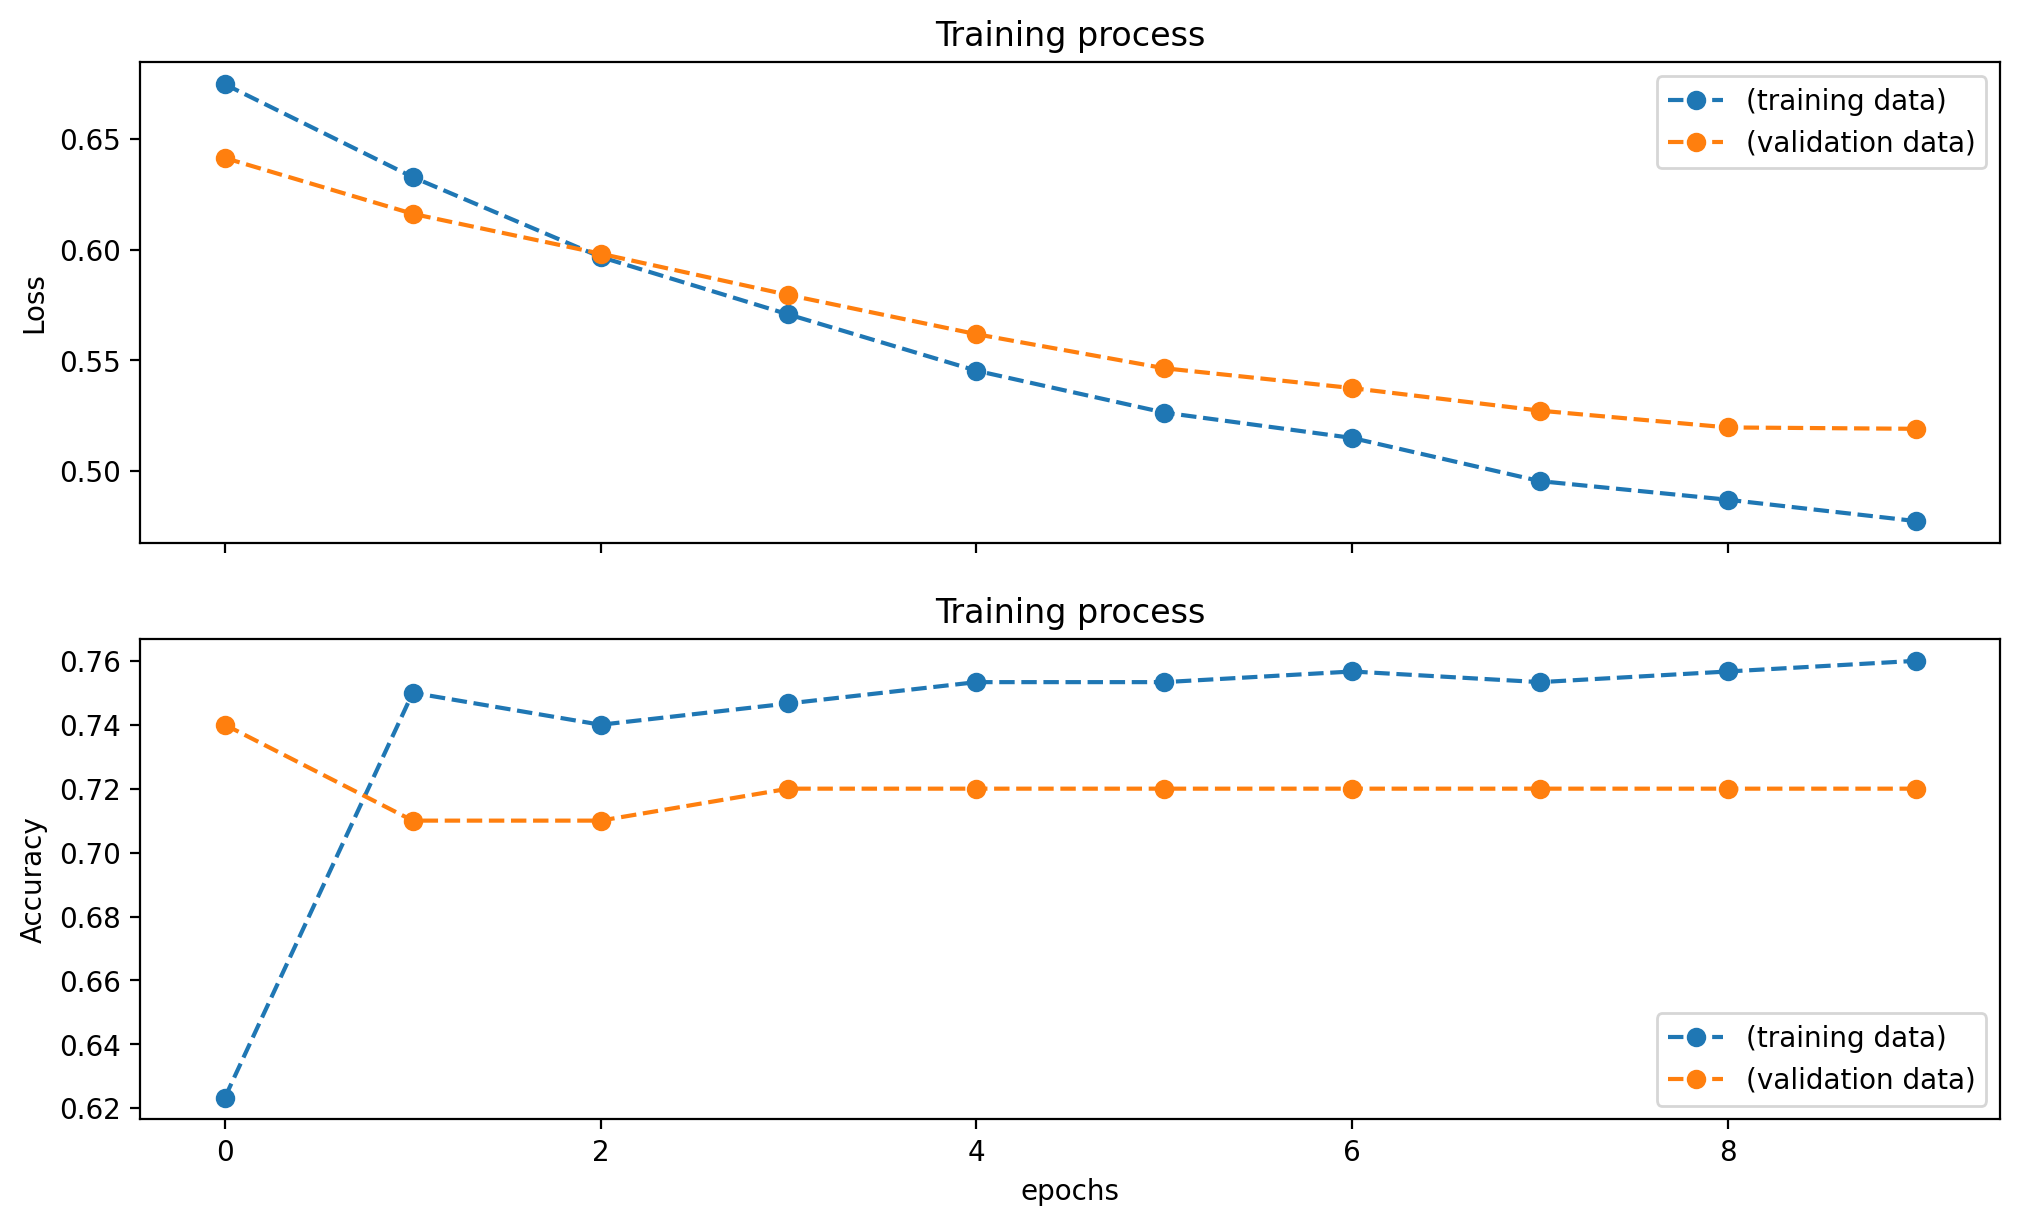

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "o--", label='(training data)')
ax1.plot(history.history['val_loss'], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(history.history['accuracy'], "o--", label='(training data)')
ax2.plot(history.history['val_accuracy'], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()